### Principal Component Analysis (PCA)
### Dimensionality reduction (minimum amount of dimensions required to present the same data)

In [76]:
using Pkg
Pkg.installed()

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\Users\paulo\AppData\Local\Programs\Julia-1.11.4\share\julia\stdlib\v1.11\Pkg\src\Pkg.jl:787


Dict{String, VersionNumber} with 12 entries:
  "CSV"               => v"0.10.15"
  "Statistics"        => v"1.11.1"
  "MLJ"               => v"0.20.7"
  "Random"            => v"1.11.0"
  "LinearAlgebra"     => v"1.11.0"
  "MultivariateStats" => v"0.10.3"
  "IJulia"            => v"1.26.0"
  "Plots"             => v"1.40.11"
  "RDatasets"         => v"0.7.7"
  "Clustering"        => v"0.15.8"
  "DataFrames"        => v"1.7.0"
  "GLM"               => v"1.9.0"

In [77]:
Pkg.add("MultivariateStats")

   Resolving package versions...
  No Changes to `C:\Users\paulo\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\paulo\.julia\environments\v1.11\Manifest.toml`


In [78]:
using MultivariateStats, RDatasets, Plots

In [84]:
iris = dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [85]:
input = Matrix(iris[:,1:4])'

4×150 adjoint(::Matrix{Float64}) with eltype Float64:
 5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  …  6.8  6.7  6.7  6.3  6.5  6.2  5.9
 3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4     3.2  3.3  3.0  2.5  3.0  3.4  3.0
 1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5     5.9  5.7  5.2  5.0  5.2  5.4  5.1
 0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2     2.3  2.5  2.3  1.9  2.0  2.3  1.8

In [86]:
M = fit(PCA, input; maxoutdim = 2)

PCA(indim = 4, outdim = 2, principalratio = 0.9776852063187949)

Pattern matrix (unstandardized loadings):
────────────────────────
         PC1         PC2
────────────────────────
1   0.743108   0.323446
2  -0.173801   0.359689
3   1.76155   -0.0854062
4   0.736739  -0.0371832
────────────────────────

Importance of components:
──────────────────────────────────────────────
                                PC1        PC2
──────────────────────────────────────────────
SS Loadings (Eigenvalues)  4.22824   0.242671
Variance explained         0.924619  0.0530665
Cumulative variance        0.924619  0.977685
Proportion explained       0.945722  0.0542777
Cumulative proportion      0.945722  1.0
──────────────────────────────────────────────

In [87]:
Y = predict(M, input)

2×150 Matrix{Float64}:
 2.68413    2.71414    2.88899   …  -1.76435    -1.90094   -1.39019
 0.319397  -0.177001  -0.144949      0.0788589   0.116628  -0.282661

In [88]:
transpose(Y)

150×2 transpose(::Matrix{Float64}) with eltype Float64:
  2.68413   0.319397
  2.71414  -0.177001
  2.88899  -0.144949
  2.74534  -0.318299
  2.72872   0.326755
  2.28086   0.74133
  2.82054  -0.0894614
  2.62614   0.163385
  2.88638  -0.578312
  2.67276  -0.113774
  2.50695   0.645069
  2.61276   0.0147299
  2.78611  -0.235112
  ⋮        
 -1.16933  -0.16499
 -2.10761   0.372288
 -2.31415   0.183651
 -1.92227   0.409203
 -1.41524  -0.574916
 -2.56301   0.277863
 -2.41875   0.304798
 -1.94411   0.187532
 -1.52717  -0.375317
 -1.76435   0.0788589
 -1.90094   0.116628
 -1.39019  -0.282661

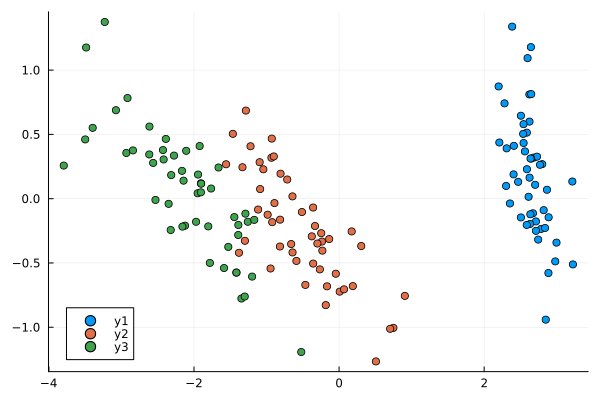

In [90]:
using Plots
scatter(Y'[1:50,1], Y'[1:50,2], makecolor=:red)
scatter!(Y'[51:100,1], Y'[51:100,2], makecolor=:green)
scatter!(Y'[101:150,1], Y'[101:150,2], makecolor=:blue)